In [1]:
import pandas as pd
train_fear_df = pd.read_csv("feartraindata.txt","\t")
test_fear_df = pd.read_csv("feartestdata.txt","\t")

In [2]:
from konlpy.tag import Okt
okt_fear = Okt()
okt_fear.pos(u'전람회 나간다')

[('전람회', 'Noun'), ('나간다', 'Verb')]

In [4]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_fear.pos(doc, norm=True, stem=True)]

In [5]:
train_fear_df.isnull().any()
train_fear_df['document'] = train_fear_df['document'].fillna('');
train_fear_df.isnull().any()
test_fear_df['document'] = test_fear_df['document'].fillna('');

In [6]:
train_fear_docs = [(tokenize(row[1]), row[2]) for row in train_fear_df.values]
test_fear_docs = [(tokenize(row[1]),row[2]) for row in test_fear_df.values]

In [8]:
print(train_fear_docs[0])
print(test_fear_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 1)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 1)


In [9]:
tokens = [t for d in train_fear_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 71499


In [10]:
import nltk
fear_text = nltk.Text(tokens, name='NMSC')
print(len(fear_text.tokens))
print(len(set(fear_text.tokens)))
print(fear_text.vocab().most_common(10))

71499
10035
[('하다/Verb', 2516), ('이/Josa', 1385), ('./Punctuation', 1185), ('?/Punctuation', 1131), ('가/Josa', 1130), ('../Punctuation', 979), ('에/Josa', 908), ('.../Punctuation', 679), ('은/Josa', 676), ('도/Josa', 647)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51008 missing from c

C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51008 missing from current fon

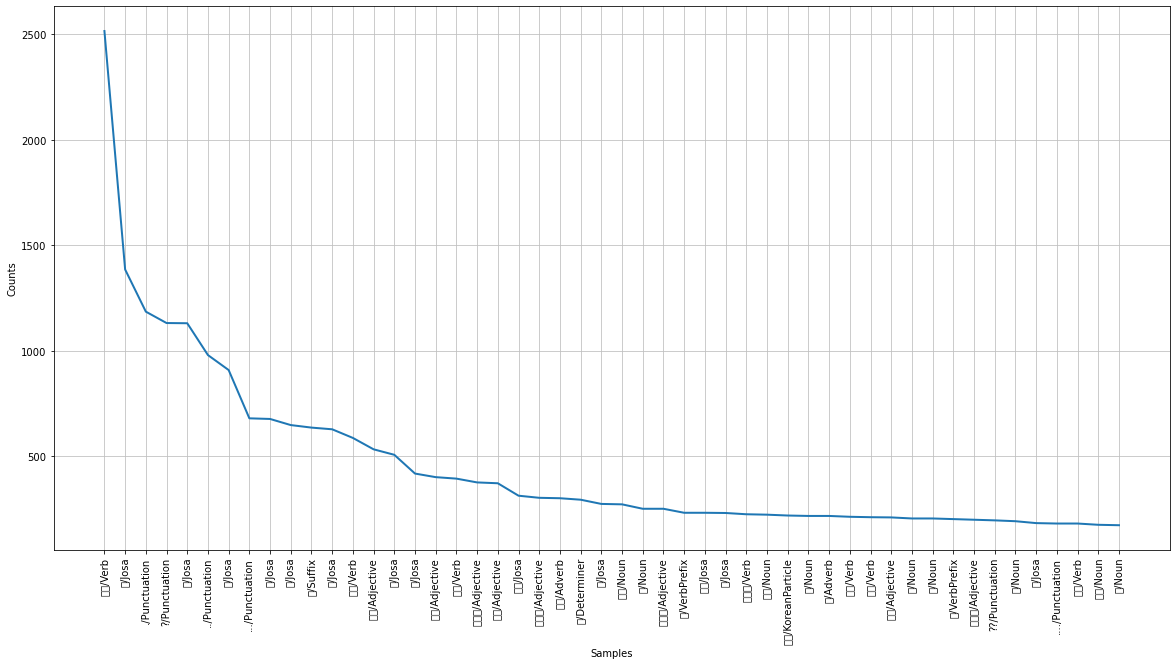

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
fear_text.plot(50)

In [12]:
FEAR_FREQUENCY_COUNT = 10000;
fear_selected_words = [f[0] for f in fear_text.vocab().most_common(FEAR_FREQUENCY_COUNT)]

In [13]:
def fear_term_frequency(doc):
    return [doc.count(word) for word in fear_selected_words]

In [14]:
x_fear_train = [fear_term_frequency(d) for d,_ in train_fear_docs]
x_fear_test = [fear_term_frequency(d) for d,_ in test_fear_docs]
y_fear_train = [c for _,c in train_fear_docs]
y_fear_test = [c for _,c in test_fear_docs]

In [15]:
import numpy as np
x_fear_train = np.asarray(x_fear_train).astype('float32')
x_fear_test = np.asarray(x_fear_test). astype('float32')

y_fear_train = np.asarray(y_fear_train).astype('float32')
y_fear_test = np.asarray(y_fear_test).astype('float32')

In [16]:
import tensorflow as tf
fear_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(FEAR_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [17]:
fear_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [18]:
fear_model.fit(x_fear_train, y_fear_train, epochs=50, batch_size=512)

Epoch 1/50
15/15 [==============================] - 0s 22ms/step - loss: 0.6646 - binary_accuracy: 0.6342
Epoch 2/50
15/15 [==============================] - 0s 21ms/step - loss: 0.5318 - binary_accuracy: 0.7839
Epoch 3/50
15/15 [==============================] - 0s 31ms/step - loss: 0.4128 - binary_accuracy: 0.8401
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 0.3245 - binary_accuracy: 0.8805
Epoch 5/50
15/15 [==============================] - 0s 21ms/step - loss: 0.2565 - binary_accuracy: 0.9104
Epoch 6/50
15/15 [==============================] - 0s 20ms/step - loss: 0.2024 - binary_accuracy: 0.9333
Epoch 7/50
15/15 [==============================] - 0s 21ms/step - loss: 0.1591 - binary_accuracy: 0.9498
Epoch 8/50
15/15 [==============================] - 0s 21ms/step - loss: 0.1249 - binary_accuracy: 0.9613
Epoch 9/50
15/15 [==============================] - 0s 21ms/step - loss: 0.0976 - binary_accuracy: 0.9715
Epoch 10/50
15/15 [===========================

In [19]:
fear_results = fear_model.evaluate(x_fear_test, y_fear_test)

103/103 [==============================] - 0s 2ms/step - loss: 3.7155 - binary_accuracy: 0.6765


In [20]:
fear_results

[3.715549945831299, 0.6765244007110596]

In [21]:
fear_model.save('fear_model.h5')

In [22]:
fear_review = "너무 무섭다"
fear_token = tokenize(fear_review)
fear_token

['너무/Adverb', '무섭다/Adjective']

In [23]:
tf = fear_term_frequency(fear_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(fear_model.predict(data))

0.9999985694885254

In [24]:
def fear_predict(predict):
    fear_token = tokenize(predict)
    fear_tfq = fear_term_frequency(fear_token)
    fear_data = np.expand_dims(np.asarray(fear_tfq).astype('float32'), axis=0)
    fear_score = float(fear_model.predict(fear_data))
    if(fear_score > 0.5):
        print(f"{predict} ==> 공포 ({round(fear_score*100)}%)")

In [25]:
fear_predict("김은지 얼굴")

In [24]:
#놀람 감정 분석

In [26]:
import pandas as pd
train_surprise_df = pd.read_csv("surprisetraindata.txt","\t")
test_surprise_df = pd.read_csv("surprisetestdata.txt","\t")

In [27]:
from konlpy.tag import Okt
okt_surprise = Okt()

In [28]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_surprise.pos(doc, norm=True, stem=True)]

In [29]:
train_surprise_df.isnull().any()
train_surprise_df['document'] = train_surprise_df['document'].fillna('');
train_surprise_df.isnull().any()
test_surprise_df['document'] = test_surprise_df['document'].fillna('');

In [30]:
train_surprise_docs = [(tokenize(row[1]), row[2]) for row in train_surprise_df.values]
test_surprise_docs = [(tokenize(row[1]),row[2]) for row in test_surprise_df.values]

In [31]:
print(train_surprise_docs[0])
print(test_surprise_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [32]:
tokens = [t for d in train_surprise_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 75323


In [33]:
import nltk
surprise_text = nltk.Text(tokens, name='NMSC')
print(len(surprise_text.tokens))
print(len(set(surprise_text.tokens)))
print(surprise_text.vocab().most_common(10))

75323
11199
[('하다/Verb', 2100), ('이/Josa', 1546), ('?/Punctuation', 1496), ('./Punctuation', 1182), ('가/Josa', 1176), ('에/Josa', 920), ('../Punctuation', 760), ('들/Suffix', 754), ('은/Josa', 744), ('.../Punctuation', 713)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12619 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44144 missing from cur

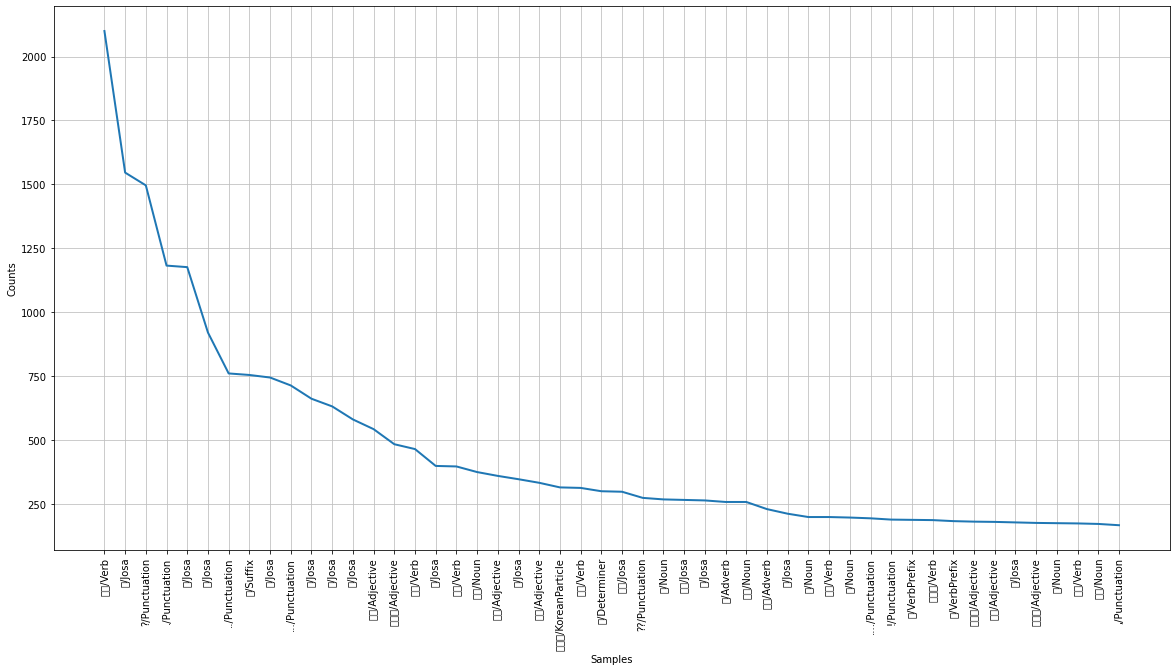

In [34]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
surprise_text.plot(50)

In [35]:
SURPRISE_FREQUENCY_COUNT = 10000;
surprise_selected_words = [f[0] for f in surprise_text.vocab().most_common(SURPRISE_FREQUENCY_COUNT)]

In [36]:
def surprise_term_frequency(doc):
    return [doc.count(word) for word in surprise_selected_words]

In [37]:
x_surprise_train = [surprise_term_frequency(d) for d,_ in train_surprise_docs]
x_surprise_test = [surprise_term_frequency(d) for d,_ in test_surprise_docs]
y_surprise_train = [c for _,c in train_surprise_docs]
y_surprise_test = [c for _,c in test_surprise_docs]

In [38]:
import numpy as np
x_surprise_train = np.asarray(x_surprise_train).astype('float32')
x_surprise_test = np.asarray(x_surprise_test). astype('float32')

y_surprise_train = np.asarray(y_surprise_train).astype('float32')
y_surprise_test = np.asarray(y_surprise_test).astype('float32')

In [39]:
import tensorflow as tf
surprise_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SURPRISE_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [40]:
surprise_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [41]:
surprise_model.fit(x_surprise_train, y_surprise_train, epochs=50, batch_size=512)

Epoch 1/50
17/17 [==============================] - 0s 20ms/step - loss: 0.6623 - binary_accuracy: 0.6507
Epoch 2/50
17/17 [==============================] - 0s 22ms/step - loss: 0.5312 - binary_accuracy: 0.7829
Epoch 3/50
17/17 [==============================] - 0s 20ms/step - loss: 0.4143 - binary_accuracy: 0.8352
Epoch 4/50
17/17 [==============================] - 0s 20ms/step - loss: 0.3228 - binary_accuracy: 0.8780
Epoch 5/50
17/17 [==============================] - 0s 21ms/step - loss: 0.2541 - binary_accuracy: 0.9049
Epoch 6/50
17/17 [==============================] - 0s 20ms/step - loss: 0.1989 - binary_accuracy: 0.9294
Epoch 7/50
17/17 [==============================] - 0s 21ms/step - loss: 0.1551 - binary_accuracy: 0.9500
Epoch 8/50
17/17 [==============================] - 0s 20ms/step - loss: 0.1225 - binary_accuracy: 0.9621
Epoch 9/50
17/17 [==============================] - 0s 21ms/step - loss: 0.0947 - binary_accuracy: 0.9725
Epoch 10/50
17/17 [===========================

In [42]:
surprise_results = surprise_model.evaluate(x_surprise_test, y_surprise_test)

111/111 [==============================] - 0s 2ms/step - loss: 4.1439 - binary_accuracy: 0.6506


In [43]:
surprise_results

[4.14385986328125, 0.6506229043006897]

In [44]:
surprise_model.save('surprise_model.h5')

In [45]:
surprise_review = "너무 놀랍다"
surprise_token = tokenize(surprise_review)
surprise_token

['너무/Adverb', '놀라다/Verb']

In [46]:
tf = surprise_term_frequency(surprise_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(surprise_model.predict(data))

0.9999825954437256

In [47]:
def surprise_predict(predict):
    surprise_token = tokenize(predict)
    surprise_tfq = surprise_term_frequency(surprise_token)
    surprise_data = np.expand_dims(np.asarray(surprise_tfq).astype('float32'), axis=0)
    surprise_score = float(surprise_model.predict(surprise_data))
    if(surprise_score > 0.5):
        print(f"{predict} ==> 놀람 ({round(surprise_score*100)}%)")

In [48]:
surprise_predict("원재상")

원재상 ==> 놀람 (100%)


In [49]:
#분노 감정 분석

In [50]:
import pandas as pd
train_anger_df = pd.read_csv("angertraindata.txt","\t")
test_anger_df = pd.read_csv("angertestdata.txt","\t")

In [51]:
from konlpy.tag import Okt
okt_anger = Okt()

In [52]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_anger.pos(doc, norm=True, stem=True)]

In [53]:
train_anger_df.isnull().any()
train_anger_df['document'] = train_anger_df['document'].fillna('');
train_anger_df.isnull().any()
test_anger_df['document'] = test_anger_df['document'].fillna('');

In [54]:
train_anger_docs = [(tokenize(row[1]), row[2]) for row in train_anger_df.values]
test_anger_docs = [(tokenize(row[1]),row[2]) for row in test_anger_df.values]

In [55]:
print(train_anger_docs[0])
print(test_anger_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [56]:
tokens = [t for d in train_anger_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 77355


In [57]:
import nltk
anger_text = nltk.Text(tokens, name='NMSC')
print(len(anger_text.tokens))
print(len(set(anger_text.tokens)))
print(anger_text.vocab().most_common(10))

77355
10887
[('하다/Verb', 2380), ('./Punctuation', 1428), ('이/Josa', 1382), ('들/Suffix', 1197), ('가/Josa', 1008), ('?/Punctuation', 989), ('에/Josa', 967), ('을/Josa', 820), ('은/Josa', 807), ('../Punctuation', 676)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47112 missing from c

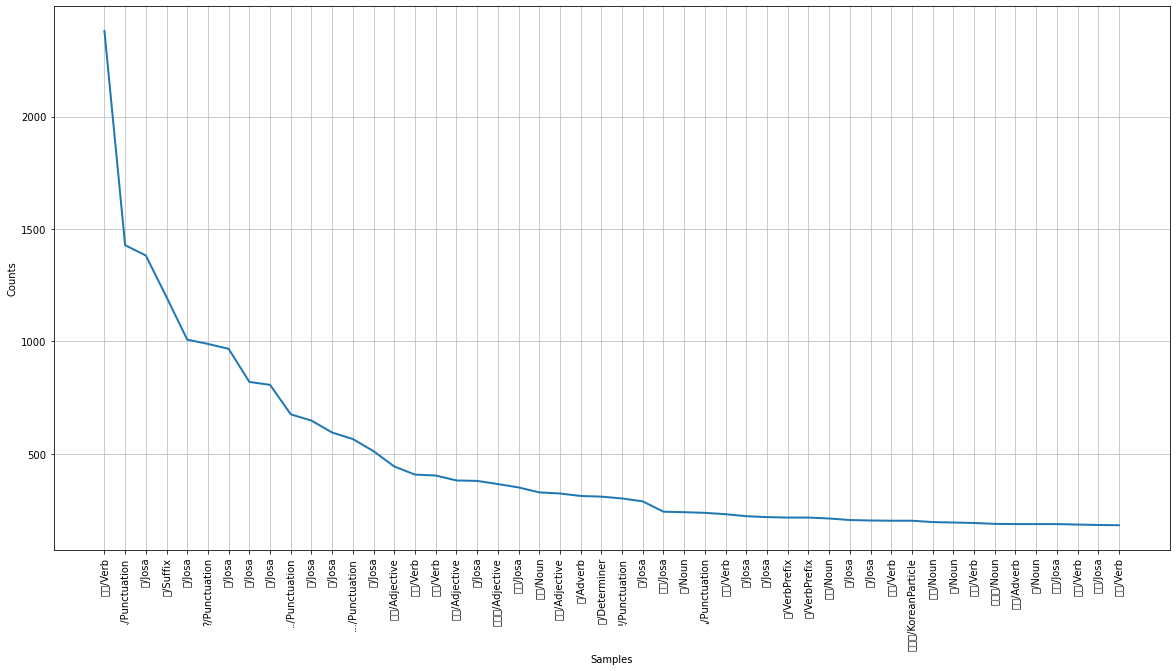

In [58]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
anger_text.plot(50)

In [59]:
ANGER_FREQUENCY_COUNT = 10000;
anger_selected_words = [f[0] for f in anger_text.vocab().most_common(ANGER_FREQUENCY_COUNT)]

In [60]:
def anger_term_frequency(doc):
    return [doc.count(word) for word in anger_selected_words]

In [61]:
x_anger_train = [anger_term_frequency(d) for d,_ in train_anger_docs]
x_anger_test = [anger_term_frequency(d) for d,_ in test_anger_docs]
y_anger_train = [c for _,c in train_anger_docs]
y_anger_test = [c for _,c in test_anger_docs]

In [62]:
import numpy as np
x_anger_train = np.asarray(x_anger_train).astype('float32')
x_anger_test = np.asarray(x_anger_test). astype('float32')

y_anger_train = np.asarray(y_anger_train).astype('float32')
y_anger_test = np.asarray(y_anger_test).astype('float32')

In [63]:
import tensorflow as tf
anger_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(ANGER_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [64]:
anger_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [65]:
anger_model.fit(x_anger_train, y_anger_train, epochs=50, batch_size=512)

Epoch 1/50
16/16 [==============================] - 0s 21ms/step - loss: 0.6492 - binary_accuracy: 0.6636
Epoch 2/50
16/16 [==============================] - 0s 21ms/step - loss: 0.4984 - binary_accuracy: 0.8086
Epoch 3/50
16/16 [==============================] - 0s 21ms/step - loss: 0.3861 - binary_accuracy: 0.8562
Epoch 4/50
16/16 [==============================] - 0s 21ms/step - loss: 0.3062 - binary_accuracy: 0.8907
Epoch 5/50
16/16 [==============================] - 0s 21ms/step - loss: 0.2449 - binary_accuracy: 0.9133
Epoch 6/50
16/16 [==============================] - 0s 23ms/step - loss: 0.1945 - binary_accuracy: 0.9330
Epoch 7/50
16/16 [==============================] - 1s 34ms/step - loss: 0.1545 - binary_accuracy: 0.9480
Epoch 8/50
16/16 [==============================] - 0s 20ms/step - loss: 0.1195 - binary_accuracy: 0.9619
Epoch 9/50
16/16 [==============================] - 0s 20ms/step - loss: 0.0939 - binary_accuracy: 0.9710
Epoch 10/50
16/16 [===========================

In [66]:
anger_results = anger_model.evaluate(x_anger_test, y_anger_test)

108/108 [==============================] - 0s 2ms/step - loss: 5.1554 - binary_accuracy: 0.6835


In [67]:
anger_results

[5.155428886413574, 0.6834889054298401]

In [68]:
anger_model.save('anger_model.h5')

In [69]:
anger_review = "너무 화난다"
anger_token = tokenize(anger_review)
anger_token

['너무/Adverb', '화나다/Verb']

In [70]:
tf = anger_term_frequency(anger_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(anger_model.predict(data))

1.0

In [71]:
def anger_predict(predict):
    anger_token = tokenize(predict)
    anger_tfq = anger_term_frequency(anger_token)
    anger_data = np.expand_dims(np.asarray(anger_tfq).astype('float32'), axis=0)
    anger_score = float(anger_model.predict(anger_data))
    if(anger_score > 0.5):
        print(f"{predict} ==> 분노 ({round(anger_score*100)}%)")

In [72]:
anger_predict("분노")

분노 ==> 분노 (99%)


In [73]:
#슬픔 감정 분석

In [74]:
import pandas as pd
train_sadness_df = pd.read_csv("sadnesstraindata.txt","\t")
test_sadness_df = pd.read_csv("sadnesstestdata.txt","\t")

In [75]:
from konlpy.tag import Okt
okt_sadness = Okt()

In [76]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_sadness.pos(doc, norm=True, stem=True)]

In [77]:
train_sadness_df.isnull().any()
train_sadness_df['document'] = train_sadness_df['document'].fillna('');
train_sadness_df.isnull().any()
test_sadness_df['document'] = test_sadness_df['document'].fillna('');

In [78]:
train_sadness_docs = [(tokenize(row[1]), row[2]) for row in train_sadness_df.values]
test_sadness_docs = [(tokenize(row[1]),row[2]) for row in test_sadness_df.values]

In [79]:
print(train_sadness_docs[0])
print(test_sadness_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [80]:
tokens = [t for d in train_sadness_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 67544


In [81]:
import nltk
sadness_text = nltk.Text(tokens, name='NMSC')
print(len(sadness_text.tokens))
print(len(set(sadness_text.tokens)))
print(sadness_text.vocab().most_common(10))

67544
9537
[('하다/Verb', 2119), ('이/Josa', 1292), ('./Punctuation', 1234), ('가/Josa', 1005), ('../Punctuation', 976), ('에/Josa', 818), ('.../Punctuation', 806), ('?/Punctuation', 734), ('들/Suffix', 694), ('도/Josa', 664)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 55192 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 55192 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44033 missing from curre

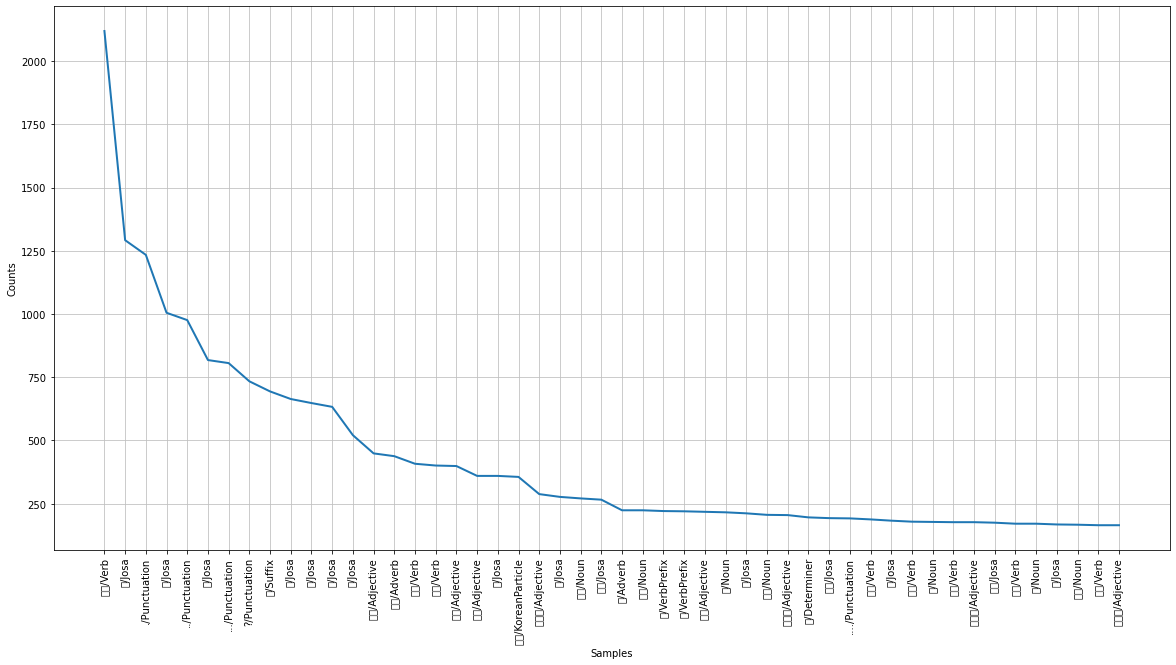

In [82]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
sadness_text.plot(50)

In [83]:
SADNESS_FREQUENCY_COUNT = 10000;
sadness_selected_words = [f[0] for f in fear_text.vocab().most_common(SADNESS_FREQUENCY_COUNT)]

In [84]:
def sadness_term_frequency(doc):
    return [doc.count(word) for word in sadness_selected_words]

In [85]:
x_sadness_train = [sadness_term_frequency(d) for d,_ in train_sadness_docs]
x_sadness_test = [sadness_term_frequency(d) for d,_ in test_sadness_docs]
y_sadness_train = [c for _,c in train_sadness_docs]
y_sadness_test = [c for _,c in test_sadness_docs]

In [86]:
import numpy as np
x_sadness_train = np.asarray(x_sadness_train).astype('float32')
x_sadness_test = np.asarray(x_sadness_test). astype('float32')

y_sadness_train = np.asarray(y_sadness_train).astype('float32')
y_sadness_test = np.asarray(y_sadness_test).astype('float32')

In [87]:
import tensorflow as tf
sadness_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SADNESS_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [88]:
sadness_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [89]:
sadness_model.fit(x_sadness_train, y_sadness_train, epochs=50, batch_size=512)

Epoch 1/50
15/15 [==============================] - 0s 21ms/step - loss: 0.6524 - binary_accuracy: 0.7075
Epoch 2/50
15/15 [==============================] - 0s 21ms/step - loss: 0.4854 - binary_accuracy: 0.8361
Epoch 3/50
15/15 [==============================] - 0s 22ms/step - loss: 0.3655 - binary_accuracy: 0.8700
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 0.2891 - binary_accuracy: 0.8977
Epoch 5/50
15/15 [==============================] - 0s 21ms/step - loss: 0.2353 - binary_accuracy: 0.9145
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 0.1925 - binary_accuracy: 0.9323
Epoch 7/50
15/15 [==============================] - 0s 33ms/step - loss: 0.1581 - binary_accuracy: 0.9449
Epoch 8/50
15/15 [==============================] - 0s 21ms/step - loss: 0.1302 - binary_accuracy: 0.9569
Epoch 9/50
15/15 [==============================] - 0s 22ms/step - loss: 0.1075 - binary_accuracy: 0.9655
Epoch 10/50
15/15 [===========================

In [90]:
sadness_results = sadness_model.evaluate(x_sadness_test, y_sadness_test)

99/99 [==============================] - 0s 2ms/step - loss: 3.2250 - binary_accuracy: 0.7185


In [91]:
sadness_results

[3.224973440170288, 0.7184927463531494]

In [92]:
sadness_model.save('sadness_model.h5')

In [93]:
sadness_review = "너무 화난다"
sadness_token = tokenize(sadness_review)
sadness_token

['너무/Adverb', '화나다/Verb']

In [94]:
tf = sadness_term_frequency(sadness_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(sadness_model.predict(data))

0.0008635250851511955

In [95]:
def sadness_predict(predict):
    sadness_token = tokenize(predict)
    sadness_tfq = sadness_term_frequency(sadness_token)
    sadness_data = np.expand_dims(np.asarray(sadness_tfq).astype('float32'), axis=0)
    sadness_score = float(sadness_model.predict(sadness_data))
    if(sadness_score > 0.5):
        print(f"{predict} ==> 슬픔 ({round(sadness_score*100)}%)")

In [96]:
sadness_predict("나 오늘 기분 좋은 일 있어")

나 오늘 기분 좋은 일 있어 ==> 슬픔 (100%)


In [97]:
#중립 감정 분석

In [98]:
import pandas as pd
train_neutral_df = pd.read_csv("neutraltraindata.txt","\t")
test_neutral_df = pd.read_csv("neutraltestdata.txt","\t")

In [99]:
from konlpy.tag import Okt
okt_neutral = Okt()

In [100]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_neutral.pos(doc, norm=True, stem=True)]

In [101]:
train_neutral_docs = [(tokenize(row[1]), row[2]) for row in train_neutral_df.values]
test_neutral_docs = [(tokenize(row[1]),row[2]) for row in test_neutral_df.values]

In [102]:
print(train_neutral_docs[0])
print(test_neutral_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [103]:
tokens = [t for d in train_neutral_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 63825


In [104]:
import nltk
neutral_text = nltk.Text(tokens, name='NMSC')
print(len(neutral_text.tokens))
print(len(set(neutral_text.tokens)))
print(neutral_text.vocab().most_common(10))

63825
10457
[('하다/Verb', 2005), ('이/Josa', 1209), ('./Punctuation', 1141), ('가/Josa', 917), ('?/Punctuation', 841), ('에/Josa', 788), ('은/Josa', 746), ('들/Suffix', 680), ('../Punctuation', 579), ('을/Josa', 578)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0, flags=flags)


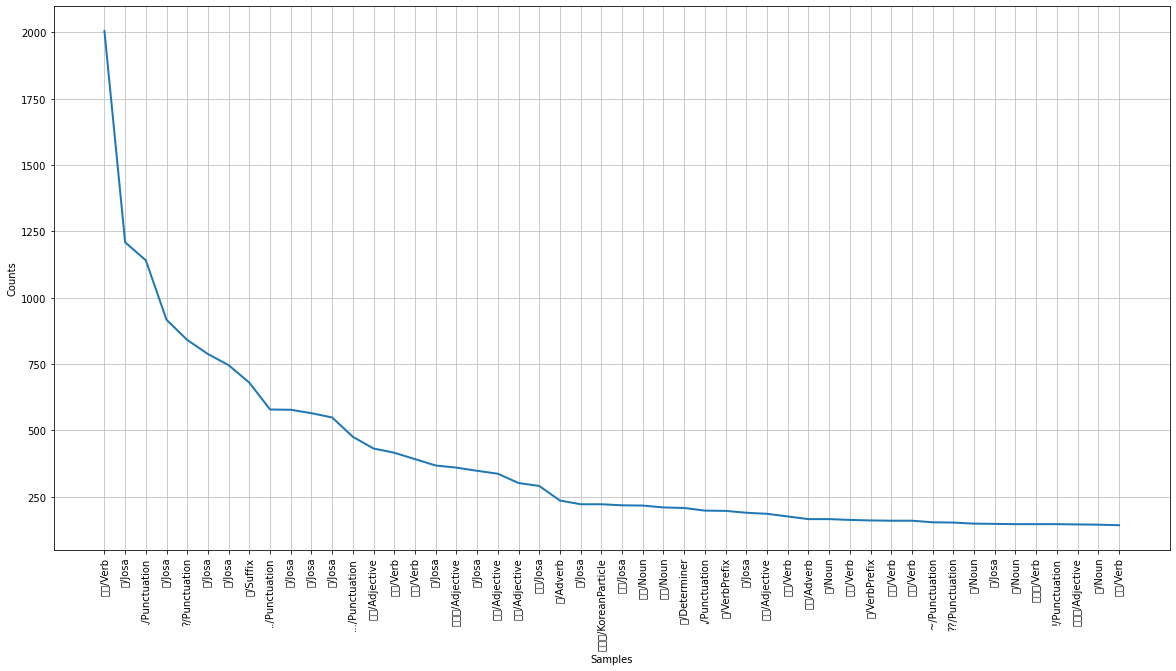

In [105]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
neutral_text.plot(50)

In [106]:
NEUTRAL_FREQUENCY_COUNT = 10000;
neutral_selected_words = [f[0] for f in neutral_text.vocab().most_common(NEUTRAL_FREQUENCY_COUNT)]

In [107]:
def neutral_term_frequency(doc):
    return [doc.count(word) for word in neutral_selected_words]

In [108]:
x_neutral_train = [neutral_term_frequency(d) for d,_ in train_neutral_docs]
x_neutral_test = [neutral_term_frequency(d) for d,_ in test_neutral_docs]
y_neutral_train = [c for _,c in train_neutral_docs]
y_neutral_test = [c for _,c in test_neutral_docs]

In [109]:
import numpy as np
x_neutral_train = np.asarray(x_neutral_train).astype('float32')
x_neutral_test = np.asarray(x_neutral_test). astype('float32')

y_neutral_train = np.asarray(y_neutral_train).astype('float32')
y_neutral_test = np.asarray(y_neutral_test).astype('float32')

In [110]:
import tensorflow as tf
neutral_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(NEUTRAL_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [111]:
neutral_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [112]:
neutral_model.fit(x_neutral_train, y_neutral_train, epochs=50, batch_size=512)

Epoch 1/50
14/14 [==============================] - 0s 24ms/step - loss: 0.6835 - binary_accuracy: 0.6047
Epoch 2/50
14/14 [==============================] - 0s 21ms/step - loss: 0.6001 - binary_accuracy: 0.7741
Epoch 3/50
14/14 [==============================] - 0s 22ms/step - loss: 0.4848 - binary_accuracy: 0.8196
Epoch 4/50
14/14 [==============================] - 0s 21ms/step - loss: 0.3833 - binary_accuracy: 0.8689
Epoch 5/50
14/14 [==============================] - 0s 22ms/step - loss: 0.3009 - binary_accuracy: 0.9003
Epoch 6/50
14/14 [==============================] - 0s 22ms/step - loss: 0.2335 - binary_accuracy: 0.9287
Epoch 7/50
14/14 [==============================] - 0s 21ms/step - loss: 0.1799 - binary_accuracy: 0.9466
Epoch 8/50
14/14 [==============================] - 1s 37ms/step - loss: 0.1372 - binary_accuracy: 0.9612
Epoch 9/50
14/14 [==============================] - 0s 20ms/step - loss: 0.1045 - binary_accuracy: 0.9717
Epoch 10/50
14/14 [===========================

In [113]:
neutral_results = neutral_model.evaluate(x_neutral_test, y_neutral_test)

91/91 [==============================] - 0s 2ms/step - loss: 4.3855 - binary_accuracy: 0.6128


In [114]:
neutral_results

[4.385465621948242, 0.6127806305885315]

In [115]:
neutral_model.save('neutral_model.h5')

In [116]:
neutral_review = "너무 화난다"
neutral_token = tokenize(neutral_review)
neutral_token

['너무/Adverb', '화나다/Verb']

In [117]:
tf = neutral_term_frequency(neutral_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(neutral_model.predict(data))

1.5337585864472203e-05

In [118]:
def neutral_predict(predict):
    neutral_token = tokenize(predict)
    neutral_tfq = neutral_term_frequency(neutral_token)
    neutral_data = np.expand_dims(np.asarray(neutral_tfq).astype('float32'), axis=0)
    neutral_score = float(neutral_model.predict(neutral_data))
    if(neutral_score > 0.5):
        print(f"{predict} ==> 중립 ({round(neutral_score*100)}%)")

In [119]:
neutral_predict("안녕")

안녕 ==> 중립 (100%)


In [120]:
#행복 감정 분석

In [121]:
import pandas as pd
train_happy_df = pd.read_csv("happytraindata.txt","\t")
test_happy_df = pd.read_csv("happytestdata.txt","\t")

In [122]:
from konlpy.tag import Okt
okt_happy = Okt()

In [123]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_happy.pos(doc, norm=True, stem=True)]

In [124]:
train_happy_docs = [(tokenize(row[1]), row[2]) for row in train_happy_df.values]
test_happy_docs = [(tokenize(row[1]),row[2]) for row in test_happy_df.values]

In [125]:
print(train_happy_docs[0])
print(test_happy_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [126]:
tokens = [t for d in train_happy_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 77548


In [127]:
import nltk
happy_text = nltk.Text(tokens, name='NMSC')
print(len(happy_text.tokens))
print(len(set(happy_text.tokens)))
print(happy_text.vocab().most_common(10))

77548
10639
[('하다/Verb', 2494), ('./Punctuation', 1664), ('이/Josa', 1364), ('가/Josa', 998), ('에/Josa', 969), ('들/Suffix', 818), ('을/Josa', 784), ('../Punctuation', 780), ('?/Punctuation', 702), ('은/Josa', 677)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47566 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54644 missing from c

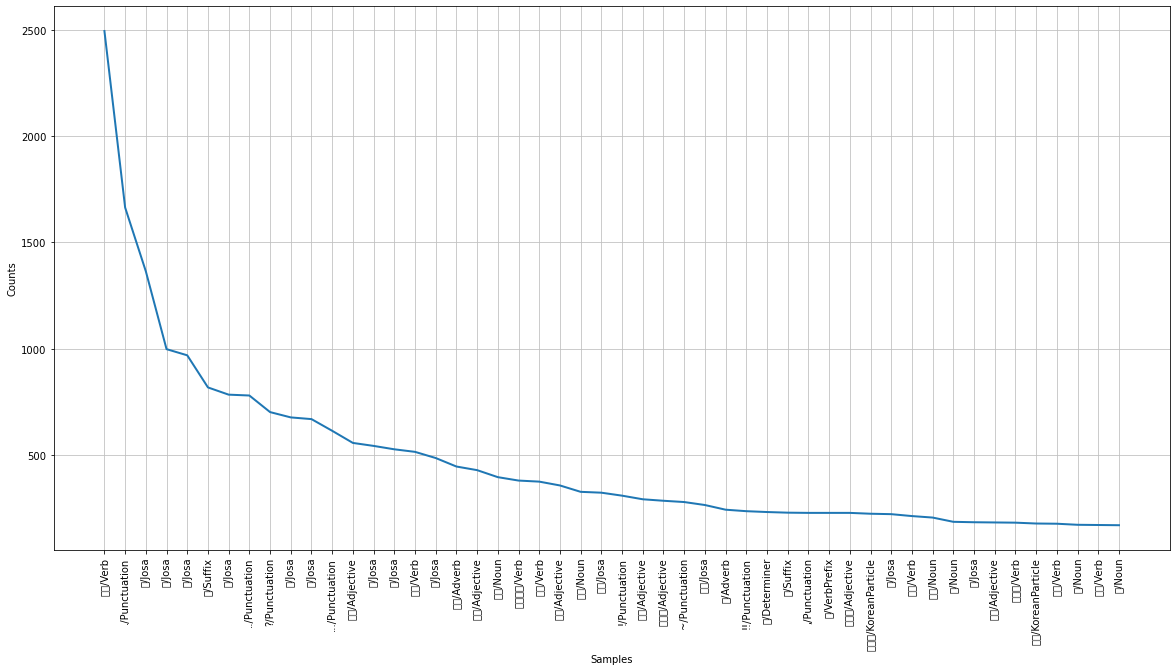

In [128]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
happy_text.plot(50)

In [129]:
HAPPY_FREQUENCY_COUNT = 10000;
happy_selected_words = [f[0] for f in happy_text.vocab().most_common(HAPPY_FREQUENCY_COUNT)]

In [130]:
def happy_term_frequency(doc):
    return [doc.count(word) for word in happy_selected_words]

In [131]:
x_happy_train = [happy_term_frequency(d) for d,_ in train_happy_docs]
x_happy_test = [happy_term_frequency(d) for d,_ in test_happy_docs]
y_happy_train = [c for _,c in train_happy_docs]
y_happy_test = [c for _,c in test_happy_docs]

In [132]:
import numpy as np
x_happy_train = np.asarray(x_happy_train).astype('float32')
x_happy_test = np.asarray(x_happy_test). astype('float32')

y_happy_train = np.asarray(y_happy_train).astype('float32')
y_happy_test = np.asarray(y_happy_test).astype('float32')

In [133]:
import tensorflow as tf
happy_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(HAPPY_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [134]:
happy_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [135]:
happy_model.fit(x_happy_train, y_happy_train, epochs=50, batch_size=512)

Epoch 1/50
17/17 [==============================] - 0s 21ms/step - loss: 0.6101 - binary_accuracy: 0.7612
Epoch 2/50
17/17 [==============================] - 0s 23ms/step - loss: 0.3731 - binary_accuracy: 0.8936
Epoch 3/50
17/17 [==============================] - 0s 24ms/step - loss: 0.2401 - binary_accuracy: 0.9289
Epoch 4/50
17/17 [==============================] - 0s 21ms/step - loss: 0.1680 - binary_accuracy: 0.9496
Epoch 5/50
17/17 [==============================] - 0s 21ms/step - loss: 0.1213 - binary_accuracy: 0.9614
Epoch 6/50
17/17 [==============================] - 0s 21ms/step - loss: 0.0892 - binary_accuracy: 0.9716
Epoch 7/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0649 - binary_accuracy: 0.9801
Epoch 8/50
17/17 [==============================] - 0s 21ms/step - loss: 0.0473 - binary_accuracy: 0.9872
Epoch 9/50
17/17 [==============================] - 0s 21ms/step - loss: 0.0343 - binary_accuracy: 0.9910
Epoch 10/50
17/17 [===========================

In [136]:
happy_results = happy_model.evaluate(x_happy_test, y_happy_test)

114/114 [==============================] - 0s 2ms/step - loss: 2.5944 - binary_accuracy: 0.7828


In [137]:
happy_results

[2.5943853855133057, 0.7828129529953003]

In [138]:
happy_model.save('happy_model.h5')

In [139]:
happy_review = "너무 화난다"
happy_token = tokenize(happy_review)
happy_token

['너무/Adverb', '화나다/Verb']

In [140]:
tf = happy_term_frequency(happy_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(happy_model.predict(data))

0.059818290174007416

In [141]:
def happy_predict(predict):
    happy_token = tokenize(predict)
    happy_tfq = happy_term_frequency(happy_token)
    happy_data = np.expand_dims(np.asarray(happy_tfq).astype('float32'), axis=0)
    happy_score = float(happy_model.predict(happy_data))
    if(happy_score > 0.5):
        print(f"{predict} ==> 행복 ({round(happy_score*100)}%)")

In [142]:
happy_predict("너무해")

너무해 ==> 행복 (99%)


In [143]:
#혐오 감정 분석

In [144]:
import pandas as pd
train_disgust_df = pd.read_csv("disgusttraindata.txt","\t")
test_disgust_df = pd.read_csv("disgusttestdata.txt","\t")

In [145]:
from konlpy.tag import Okt
okt_disgust = Okt()

In [146]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_disgust.pos(doc, norm=True, stem=True)]

In [147]:
train_disgust_docs = [(tokenize(row[1]), row[2]) for row in train_disgust_df.values]
test_disgust_docs = [(tokenize(row[1]),row[2]) for row in test_disgust_df.values]

In [148]:
print(train_disgust_docs[0])
print(test_disgust_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [149]:
tokens = [t for d in train_disgust_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 77300


In [150]:
import nltk
disgust_text = nltk.Text(tokens, name='NMSC')
print(len(disgust_text.tokens))
print(len(set(disgust_text.tokens)))
print(disgust_text.vocab().most_common(10))

77300
11099
[('하다/Verb', 2392), ('이/Josa', 1463), ('./Punctuation', 1417), ('들/Suffix', 1173), ('가/Josa', 1040), ('에/Josa', 956), ('?/Punctuation', 918), ('은/Josa', 890), ('을/Josa', 735), ('../Punctuation', 696)]


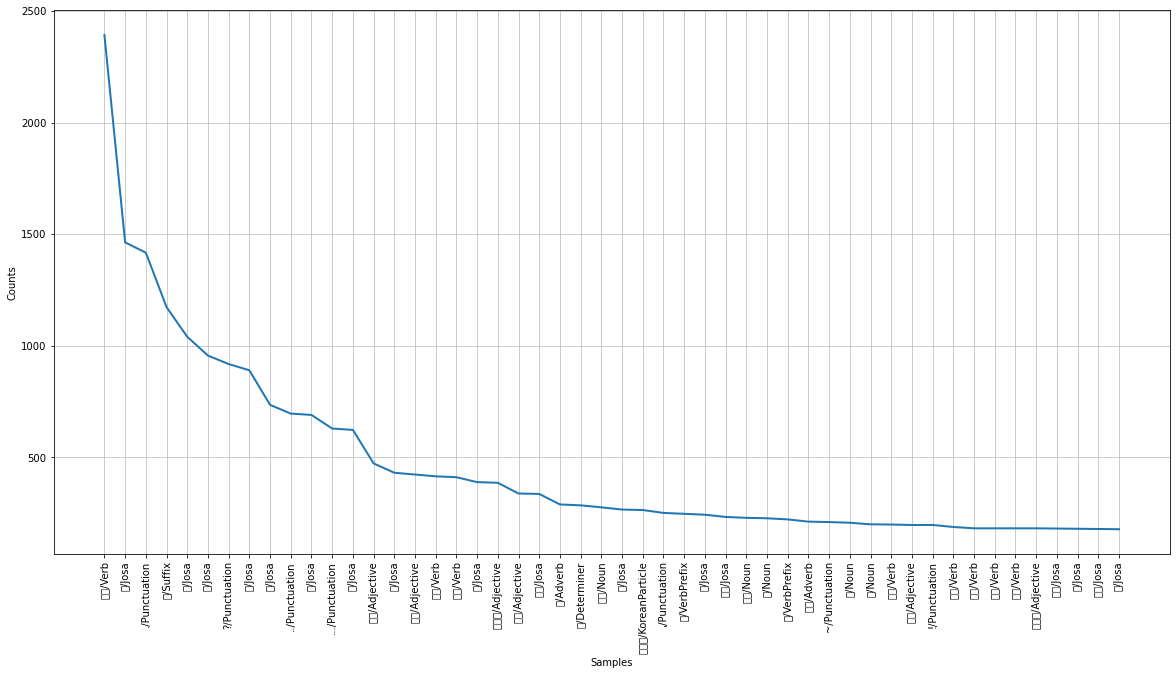

In [151]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
disgust_text.plot(50)

In [152]:
DISGUST_FREQUENCY_COUNT = 10000;
disgust_selected_words = [f[0] for f in disgust_text.vocab().most_common(DISGUST_FREQUENCY_COUNT)]

In [153]:
def disgust_term_frequency(doc):
    return [doc.count(word) for word in disgust_selected_words]

In [154]:
x_disgust_train = [disgust_term_frequency(d) for d,_ in train_disgust_docs]
x_disgust_test = [disgust_term_frequency(d) for d,_ in test_disgust_docs]
y_disgust_train = [c for _,c in train_disgust_docs]
y_disgust_test = [c for _,c in test_disgust_docs]

In [155]:
import numpy as np
x_disgust_train = np.asarray(x_disgust_train).astype('float32')
x_disgust_test = np.asarray(x_disgust_test). astype('float32')

y_disgust_train = np.asarray(y_disgust_train).astype('float32')
y_disgust_test = np.asarray(y_disgust_test).astype('float32')

In [156]:
import tensorflow as tf
disgust_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(DISGUST_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [157]:
disgust_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [158]:
disgust_model.fit(x_disgust_train, y_disgust_train, epochs=50, batch_size=512)

Epoch 1/50
15/15 [==============================] - 0s 21ms/step - loss: 0.6673 - binary_accuracy: 0.6428
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 0.5452 - binary_accuracy: 0.7820
Epoch 3/50
15/15 [==============================] - 0s 28ms/step - loss: 0.4305 - binary_accuracy: 0.8368
Epoch 4/50
15/15 [==============================] - 0s 24ms/step - loss: 0.3406 - binary_accuracy: 0.8768
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 0.2681 - binary_accuracy: 0.9069
Epoch 6/50
15/15 [==============================] - 0s 22ms/step - loss: 0.2077 - binary_accuracy: 0.9330
Epoch 7/50
15/15 [==============================] - 0s 22ms/step - loss: 0.1598 - binary_accuracy: 0.9504
Epoch 8/50
15/15 [==============================] - 0s 23ms/step - loss: 0.1225 - binary_accuracy: 0.9634
Epoch 9/50
15/15 [==============================] - 0s 22ms/step - loss: 0.0919 - binary_accuracy: 0.9751
Epoch 10/50
15/15 [===========================

In [159]:
disgust_results = neutral_model.evaluate(x_disgust_test, y_disgust_test)

101/101 [==============================] - 0s 2ms/step - loss: 6.5799 - binary_accuracy: 0.5002


In [160]:
disgust_results

[6.579923152923584, 0.5001551508903503]

In [161]:
disgust_model.save('disgust_model.h5')

In [162]:
disgust_review = "너무 화난다"
disgust_token = tokenize(disgust_review)
disgust_token

['너무/Adverb', '화나다/Verb']

In [163]:
tf = disgust_term_frequency(disgust_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(disgust_model.predict(data))

0.9993451237678528

In [164]:
def disgust_predict(predict):
    disgust_token = tokenize(predict)
    disgust_tfq = disgust_term_frequency(disgust_token)
    disgust_data = np.expand_dims(np.asarray(disgust_tfq).astype('float32'), axis=0)
    disgust_score = float(disgust_model.predict(disgust_data))
    if(disgust_score > 0.5):
        print(f"{predict} ==> 혐오 ({round(disgust_score*100)}%)")

In [165]:
disgust_predict("원재상")

원재상 ==> 혐오 (99%)


In [170]:
def predict(predict):
    disgust_predict(predict)
    sadness_predict(predict)
    happy_predict(predict)
    anger_predict(predict)
    fear_predict(predict)
    neutral_predict(predict)
    surprise_predict(predict)

In [192]:
predict("칭찬을 받으니 기분이 좋아")

칭찬을 받으니 기분이 좋아 ==> 혐오 (100%)
칭찬을 받으니 기분이 좋아 ==> 행복 (100%)
칭찬을 받으니 기분이 좋아 ==> 공포 (98%)
